In [63]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.decomposition import PCA
plt.style.use('ggplot')

## 訓練データ生成

In [10]:
def gen_data(n_samples):
    """多変量正規分布に従う乱数を生成する"""
    mean = [0, 0]  # 平均
    cov = [[2, 0.7], [0.7, 1]]  # 共分散行列を作成
    X = np.random.multivariate_normal(mean, cov, n_samples)
    return X

In [11]:
n_samples = 100

In [12]:
X = gen_data(n_samples)

In [17]:
print(X.shape)
print(X[:3])

(100, 2)
[[2.3812454  1.56758145]
 [1.28882128 0.73901358]
 [0.01316016 0.46492376]]


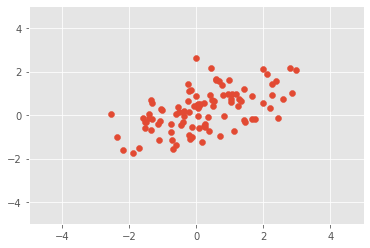

In [61]:
# 多変量データの散布図を描画
plt.scatter(X[:, 0], X[:, 1])
plt.xlim(-5, 5)
plt.ylim(-5, 5)
plt.show()

## 学習
訓練データ $X = [x_{1}, x_{2}, ..., x_{n}]^{\mathrm{T}}$ に対して $\mathbb{E}[x]=0$ となるように変換する。 <br/>
すると、不偏共分散行列は $Var[x] = \frac{1}{n-1} X^{\mathrm{T}}X$ と書ける。 <br/>
$Var[x]$ を固有値分解し、固有値の大きい順に対応する固有ベクトルを第1主成分( $w_{1}$ ), 第2主成分( $w_{2}$ ), ...とよぶ。

In [22]:
def get_moments(X):
    mean = X.mean(axis=0)  # 多変量データの平均
    X = X - mean
    standard_cov = np.dot(X.T, X) / (len(X) - 1)  # 不偏共分散行列を求める
    return mean, standard_cov

In [19]:
def get_components(eig_vectors, n_components):
    """ 固有ベクトルから主成分を取得する
    
    Parameter
    -----------
    eig_vectors : np.ndarray
        固有ベクトル
    n_components : int
        主成分の数
    """
    W = eig_vectors[:, ::-1][:, :n_components]
    return W.T

In [20]:
n_components = 2

In [23]:
#分散共分散行列を標準化
mean, standard_cov = get_moments(X)

In [25]:
print(mean)
print(standard_cov)

[0.1933388  0.24116131]
[[1.56135913 0.64611946]
 [0.64611946 0.87742964]]


In [27]:
# 固有値と固有ベクトルを計算
# np.linalg.eigh はエルミート行列を入力として固有値と固有ベクトルを出力する
eig_values, eig_vectors = np.linalg.eigh(standard_cov)

In [29]:
print(eig_values)  # 固有値
print(eig_vectors)  # 固有ベクトル

[0.48836071 1.95042807]
[[ 0.51585731 -0.85667452]
 [-0.85667452 -0.51585731]]
<class 'numpy.ndarray'>


In [30]:
components = get_components(eigenvectors, n_components)

In [47]:
print(components)

[[-0.85667452 -0.51585731]
 [ 0.51585731 -0.85667452]]


In [48]:
w1 = components[0, :]
w2 = components[1, :]

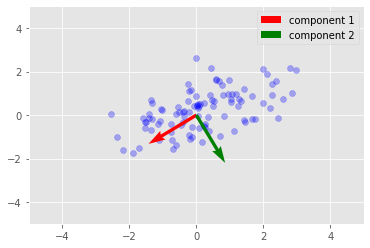

In [62]:
# 元データの散布図
plt.scatter(X[:, 0], X[:, 1], color='b', alpha=0.3)
# 第1主成分： (0, 0)を中心に、w1[0]からw1[1]へのベクトルを描画
plt.quiver(0, 0, w1[0], w1[1], width=0.01, scale=6, color='red', label='component 1')
# 第2主成分： (0, 0)を中心に、w2[0]からw2[1]へのベクトルを描画
plt.quiver(0, 0, w2[0], w2[1], width=0.01, scale=6, color='green', label='component 2')
plt.xlim(-5, 5)
plt.ylim(-5, 5)
plt.legend()
plt.show()

## 変換（射影）
元のデータを $m$ 次元に射影するときは、行列 $W$ を $W=[w_{1}, w_{2}, \cdots, w_{m}]$ とし、データ点 $x$ を $z = W^{\mathrm{T}} x$ によって変換(射影)する。 <br/>
よって、データ $X$ に対しては $Z = X^{\mathrm{T}}W$ によって変換する。

In [56]:
def transform_by_pca(X, PCA):
    """データXをpcaによって変換する"""
    mean = X.mean(axis=0)
    X = X - mean
    Z = np.dot(X, PCA)
    return Z

In [57]:
Z = transform_by_pca(X, components.T)

In [59]:
print(Z.shape)

(100, 2)


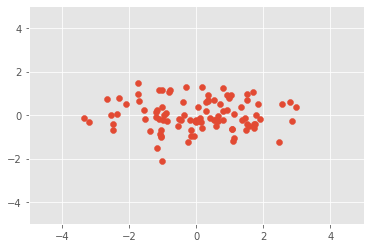

In [60]:
plt.scatter(Z[:, 0], Z[:, 1])
plt.xlim(-5, 5)
plt.ylim(-5, 5)
plt.show()

## 逆変換
射影されたデータ点 $z$ を元のデータ空間へ逆変換するときは $\bar{x} = (W^{\mathrm{T}})^{-1} z = Wz$ によって変換する。 <br/>
よって、射影されたデータ $Z$ に対しては $\bar{X} = ZW^{\mathrm{T}}$ によって変換する。

In [64]:
mean = X.mean(axis=0)
X_ = np.dot(Z, components.T) + mean

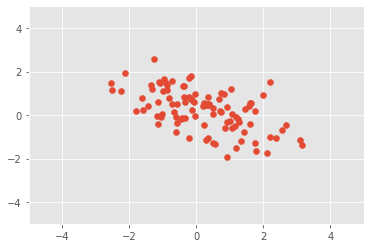

In [65]:
plt.scatter(X_[:, 0], X_[:, 1])
plt.xlim(-5, 5)
plt.ylim(-5, 5)
plt.show()

## （比較用）sklearnで主成分分析

In [66]:
pca = PCA(n_components=2)
pca.fit(X)

PCA(n_components=2)

In [71]:
print(f'主成分:\n{pca.components_}')
print(f'平均: {pca.mean_}')
print(f'共分散:\n{pca.get_covariance()}') 

主成分:
[[ 0.85667452  0.51585731]
 [-0.51585731  0.85667452]]
平均: [0.1933388  0.24116131]
共分散:
[[1.56135913 0.64611946]
 [0.64611946 0.87742964]]


In [69]:
w1 = pca.components_[0, :]
w2 = pca.components_[1, :]

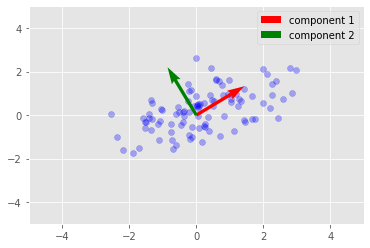

In [70]:
# 元データの散布図
plt.scatter(X[:, 0], X[:, 1], color='b', alpha=0.3)
# 第1主成分： (0, 0)を中心に、w1[0]からw1[1]へのベクトルを描画
plt.quiver(0, 0, w1[0], w1[1], width=0.01, scale=6, color='red', label='component 1')
# 第2主成分： (0, 0)を中心に、w2[0]からw2[1]へのベクトルを描画
plt.quiver(0, 0, w2[0], w2[1], width=0.01, scale=6, color='green', label='component 2')
plt.xlim(-5, 5)
plt.ylim(-5, 5)
plt.legend()
plt.show()